# **Data sets overlapping**

##**Import libraries**

In [ ]:
!pip install venn
from venn import venn
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19698 sha256=e813ec411aaf74ef81b68c4a1d1c4b2dc9e9c985cf10bd25d76d9e8a59743b8f
  Stored in directory: /root/.cache/pip/wheels/9c/ce/43/705b4a04cd822891d1d7a4c43fc444b4798978e72c79528c5f
Successfully built venn
Mounted at /content/drive


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 30.2 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors, Descriptors3D, rdMolDescriptors, Scaffolds
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
PandasTools.RenderImagesInAllDataFrames(images = True) # to molecules visualization
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import os, sys, random, string

##**Compounds overlapping**

In [ ]:
# mount databases
foodb = pd.read_csv('https://raw.githubusercontent.com/DIFACQUIM/Food_chemicals_characterization/main/foodb_curated.csv')
unpda = pd.read_csv('https://raw.githubusercontent.com/DIFACQUIM/Food_chemicals_characterization/main/unpda_curated.csv')
fda = pd.read_csv('https://raw.githubusercontent.com/DIFACQUIM/Food_chemicals_characterization/main/fda_curated.csv')

# select necessary columns
foodb = foodb[['PUBLIC_ID', 'SMILES_no_chiral']]
unpda = unpda[['ID', 'SMILES_no_chiral']]
fda = fda[['ID', 'SMILES_no_chiral']]

# unify the name of the columns
foodb.columns = ['ID', 'SMILES']
unpda.columns = ['ID', 'SMILES']
fda.columns = ['ID', 'SMILES']

# remove duplicates (if they are) in column smiles for each database
foodb = foodb.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)
unpda = unpda.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)
fda = fda.drop_duplicates(subset = 'SMILES', keep = 'first').reset_index(drop = True)

print(foodb.shape)
print(unpda.shape)
print(fda.shape)

(52856, 2)
(14994, 2)
(2324, 2)


In [ ]:
foodb_unpda_overlap = foodb.merge(unpda, on = 'SMILES')
foodb_unpda_overlap.to_csv('foodb_unpda_overlap.csv', index = False)
foodb_unpda_overlap

,ID_x,SMILES,ID_y
0,FDB000095,O=C(OC1Cc2c(O)cc(O)cc2OC1c1cc(O)c(O)c(O)c1)c1c...,UNPD_subset_A_9154
1,FDB000108,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2c1c(O)c...,UNPD_subset_A_4636
2,FDB000138,O=C(O)C1OC(Oc2cc(O)c3c(=O)cc(-c4ccc(O)cc4)oc3c...,UNPD_subset_A_13435
3,FDB000152,O=C(O)C1OC(OC2C(Oc3cc(O)c4c(=O)cc(-c5ccc(O)cc5...,UNPD_subset_A_8090
4,FDB000173,O=c1c(OC2OC(CO)C(O)C(O)C2O)c(-c2ccc(OC3OC(CO)C...,UNPD_subset_A_820
...,...,...,...
1378,FDB111802,CC(NC(=O)C(N)CC(=O)O)C(=O)O,UNPD_subset_A_910
1379,FDB111807,NC(CC(=O)O)C(=O)NC(CCC(=O)O)C(=O)O,UNPD_subset_A_2010
1380,FDB111863,NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)O,UNPD_subset_A_2032
1381,FDB111965,CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C,UNPD_subset_A_6081


In [ ]:
foodb_unpda_fda_overlap = foodb_unpda_overlap.merge(fda, on = "SMILES")
foodb_unpda_fda_overlap.to_csv('foodb_unpda_fda_overlap.csv')
foodb_unpda_fda_overlap

,ID_x,SMILES,ID_y,ID
0,FDB000257,O=C(C(=O)C(O)O)C(O)O,UNPD_subset_A_13829,DB13707
1,FDB000662,O=C(O)c1cc(O)c(O)c(O)c1,UNPD_subset_A_14401,DB13909
2,FDB000753,CCO,UNPD_subset_A_4692,DB00898
3,FDB000756,OCC(O)CO,UNPD_subset_A_4756,DB09462
4,FDB000764,C[S+](C)[O-],UNPD_subset_A_10493,DB01093
5,FDB000885,Oc1ccc(O)cc1,UNPD_subset_A_7904,DB09526
6,FDB000893,Oc1ccccc1,UNPD_subset_A_9084,DB03255
7,FDB001028,CCOC(=O)c1ccccc1O,UNPD_subset_A_3400,DB15576
8,FDB001109,O=C(C(O)CO)C(O)C(O)CO,UNPD_subset_A_2698,DB01914
9,FDB001116,O=C(C(=O)C(O)C(O)C(O)O)C(O)O,UNPD_subset_A_5802,DB13962


In [ ]:
foodb_fda_overlap = foodb.merge(fda, on = 'SMILES')
foodb_fda_overlap.to_csv('foodb_fda_overlap.csv', index = False)
foodb_fda_overlap

,ID_x,SMILES,ID_y
0,FDB000168,CC1OC(OCC2OC(Oc3c(-c4ccc(O)c(O)c4)oc4cc(O)cc(O...,DB01698
1,FDB000257,O=C(C(=O)C(O)O)C(O)O,DB13707
2,FDB000362,CC12CCC3c4ccc(O)cc4CCC3C1CCC2O,DB00783
3,FDB000446,NC(Cc1ccc(O)cc1)C(=O)O,DB00135
4,FDB000447,COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC,DB01113
...,...,...,...
421,FDB031286,OCC1OC(O)(CO)C(O)C1O,DB04173
422,FDB031310,CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21,DB00470
423,FDB097216,Clc1ccc(C(c2ccccc2Cl)C(Cl)Cl)cc1,DB00648
424,FDB098104,NC1CONC1=O,DB00260


###**Venn diagram**

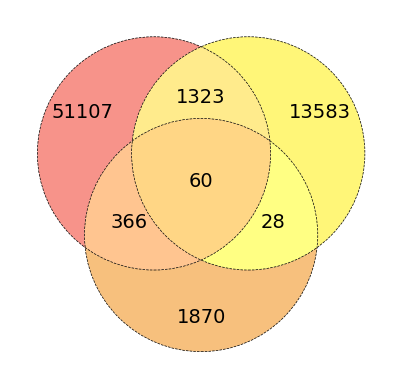

In [ ]:
v3 = venn3_unweighted([set(foodb.SMILES), set(unpda.SMILES), set(fda.SMILES)],
                      set_labels=(None, None, None),
                      alpha=0.6, set_colors=('#F24C3D', '#FFF11E', '#F29727'),
                      )
venn3_circles(subsets = [1,1,1,1,1,1,1],
              linestyle = 'dashed',
              linewidth = 0.5)
for text in v3.set_labels:
    text.set_fontsize(17)
for text in v3.subset_labels:
    text.set_fontsize(14)

plt.savefig(fname = 'overlap_compounds.png', dpi = 600, bbox_inches = 'tight', transparent = True)

##**Scaffold overlapping**

In [ ]:
# mount databases
foodb_sca = pd.read_csv('foodb_scaffolds.csv')
unpda_sca = pd.read_csv('unpda_scaffolds.csv')
fda_sca = pd.read_csv('fda_scaffolds.csv')

foodb_sca = foodb_sca[['ID', 'SCAFFOLD']]
unpda_sca = unpda_sca[['ID', 'SCAFFOLD']]
fda_sca = fda_sca[['ID', 'SCAFFOLD']]

print(foodb_sca.shape)
print(unpda_sca.shape)
print(fda_sca.shape)

(52856, 2)
(14994, 2)
(2324, 2)


In [ ]:
foodb_sca = foodb_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)
unpda_sca = unpda_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)
fda_sca = fda_sca.drop_duplicates(subset = ['SCAFFOLD'], keep = 'first').reset_index(drop = True)

print(foodb_sca.shape)
print(unpda_sca.shape)
print(fda_sca.shape)

(4336, 2)
(7059, 2)
(1291, 2)


In [ ]:
foodb_unpda_sca_overlap = foodb_sca.merge(unpda_sca, on = 'SCAFFOLD')
foodb_unpda_sca_overlap.to_csv('foodb_unpda_sca_overlap.csv', index = False)
foodb_unpda_sca_overlap

,ID_x,SCAFFOLD,ID_y
0,FDB000082,O=C(C=Cc1ccccc1)c1ccccc1,UNPD_subset_A_54
1,FDB000095,O=C(OC1Cc2ccccc2OC1c1ccccc1)c1ccccc1,UNPD_subset_A_2494
2,FDB000108,c1ccc(C2CC(c3cccc4c3OC(c3ccccc3)CC4c3cccc4c3OC...,UNPD_subset_A_1614
3,FDB000115,NaN,UNPD_subset_A_2
4,FDB000133,O=C1CC(c2ccccc2)Oc2ccccc21,UNPD_subset_A_28
...,...,...,...
1278,FDB097316,O=C1CCCC2C3CC(CN12)C1CCCCN1C3,UNPD_subset_A_5870
1279,FDB098401,O=C(CCc1ccccc1)NCC(=O)NCCc1ccccc1,UNPD_subset_A_4996
1280,FDB111658,O=C1CCCN1c1ccccc1,UNPD_subset_A_14097
1281,FDB111660,c1cc2ccc3cccc4ccc(c1)c2c34,UNPD_subset_A_2117


In [ ]:
foodb_unpda_fda_sca_overlap = foodb_unpda_sca_overlap.merge(fda_sca, on = 'SCAFFOLD')
foodb_unpda_fda_sca_overlap.to_csv('foodb_unpda_fda_sca_overlap.csv', index = False)
foodb_unpda_fda_sca_overlap

,ID_x,SCAFFOLD,ID_y,ID
0,FDB000115,NaN,UNPD_subset_A_2,DB00119
1,FDB000146,O=c1cc(-c2ccccc2)oc2ccccc12,UNPD_subset_A_7,DB07776
2,FDB000168,O=c1c(OC2CCCC(COC3CCCCO3)O2)c(-c2ccccc2)oc2ccc...,UNPD_subset_A_2606,DB01698
3,FDB000222,c1ccccc1,UNPD_subset_A_5,DB00120
4,FDB000229,O=C(Oc1ccccc1)c1ccccc1,UNPD_subset_A_681,DB01399
...,...,...,...,...
135,FDB023596,c1ccc(C2OCc3ccccc32)cc1,UNPD_subset_A_11520,DB00215
136,FDB023601,C1OC2COC3OCOC3C2O1,UNPD_subset_A_4784,DB00273
137,FDB023781,C1=C2CCC3C4CCCC4CCC3C2CCC1,UNPD_subset_A_812,DB00823
138,FDB031309,C1=CC2c3ccccc3OCC2CC1,UNPD_subset_A_665,DB00470


In [ ]:
foodb_fda_sca_overlap = foodb_sca.merge(fda_sca, on = 'SCAFFOLD')
foodb_fda_sca_overlap.to_csv('foodb_fda_sca_overlap.csv', index = False)
foodb_fda_sca_overlap

,ID_x,SCAFFOLD,ID_y
0,FDB000115,NaN,DB00119
1,FDB000146,O=c1cc(-c2ccccc2)oc2ccccc12,DB07776
2,FDB000168,O=c1c(OC2CCCC(COC3CCCCO3)O2)c(-c2ccccc2)oc2ccc...,DB01698
3,FDB000222,c1ccccc1,DB00120
4,FDB000229,O=C(Oc1ccccc1)c1ccccc1,DB01399
...,...,...,...
248,FDB030760,N=c1[nH]c2c(c(=O)[nH]1)NC1CC3O[PH](=O)(=O)OCC3...,DB16628
249,FDB031309,C1=CC2c3ccccc3OCC2CC1,DB00470
250,FDB097217,C=C(c1ccccc1)c1ccccc1,DB09535
251,FDB111668,O=C1C=CC2(CC1)Oc1ccccc1C2=O,DB00400


###**Venn diagram**

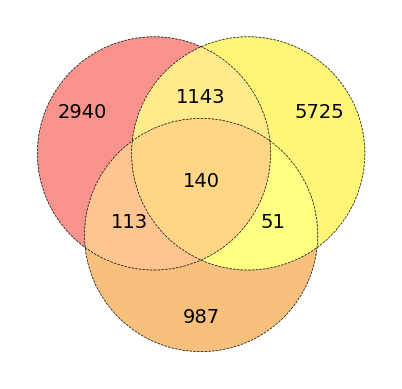

In [ ]:
v3_sca = venn3_unweighted([set(foodb_sca.SCAFFOLD), set(unpda_sca.SCAFFOLD), set(fda_sca.SCAFFOLD)],
                      set_labels=(None, None, None),
                      alpha=0.6, set_colors=('#F24C3D', '#FFF11E', '#F29727'),
                      )
venn3_circles(subsets = [1,1,1,1,1,1,1],
              linestyle = 'dashed',
              linewidth = 0.5)

for text in v3_sca.set_labels:
    text.set_fontsize(17)
for text in v3_sca.subset_labels:
    text.set_fontsize(14)

plt.savefig(fname = 'overlap_scaffolds.png', dpi = 600, bbox_inches = 'tight', transparent = True)

##**Final visualization**

<ipython-input-16-c34d5a7dc812>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


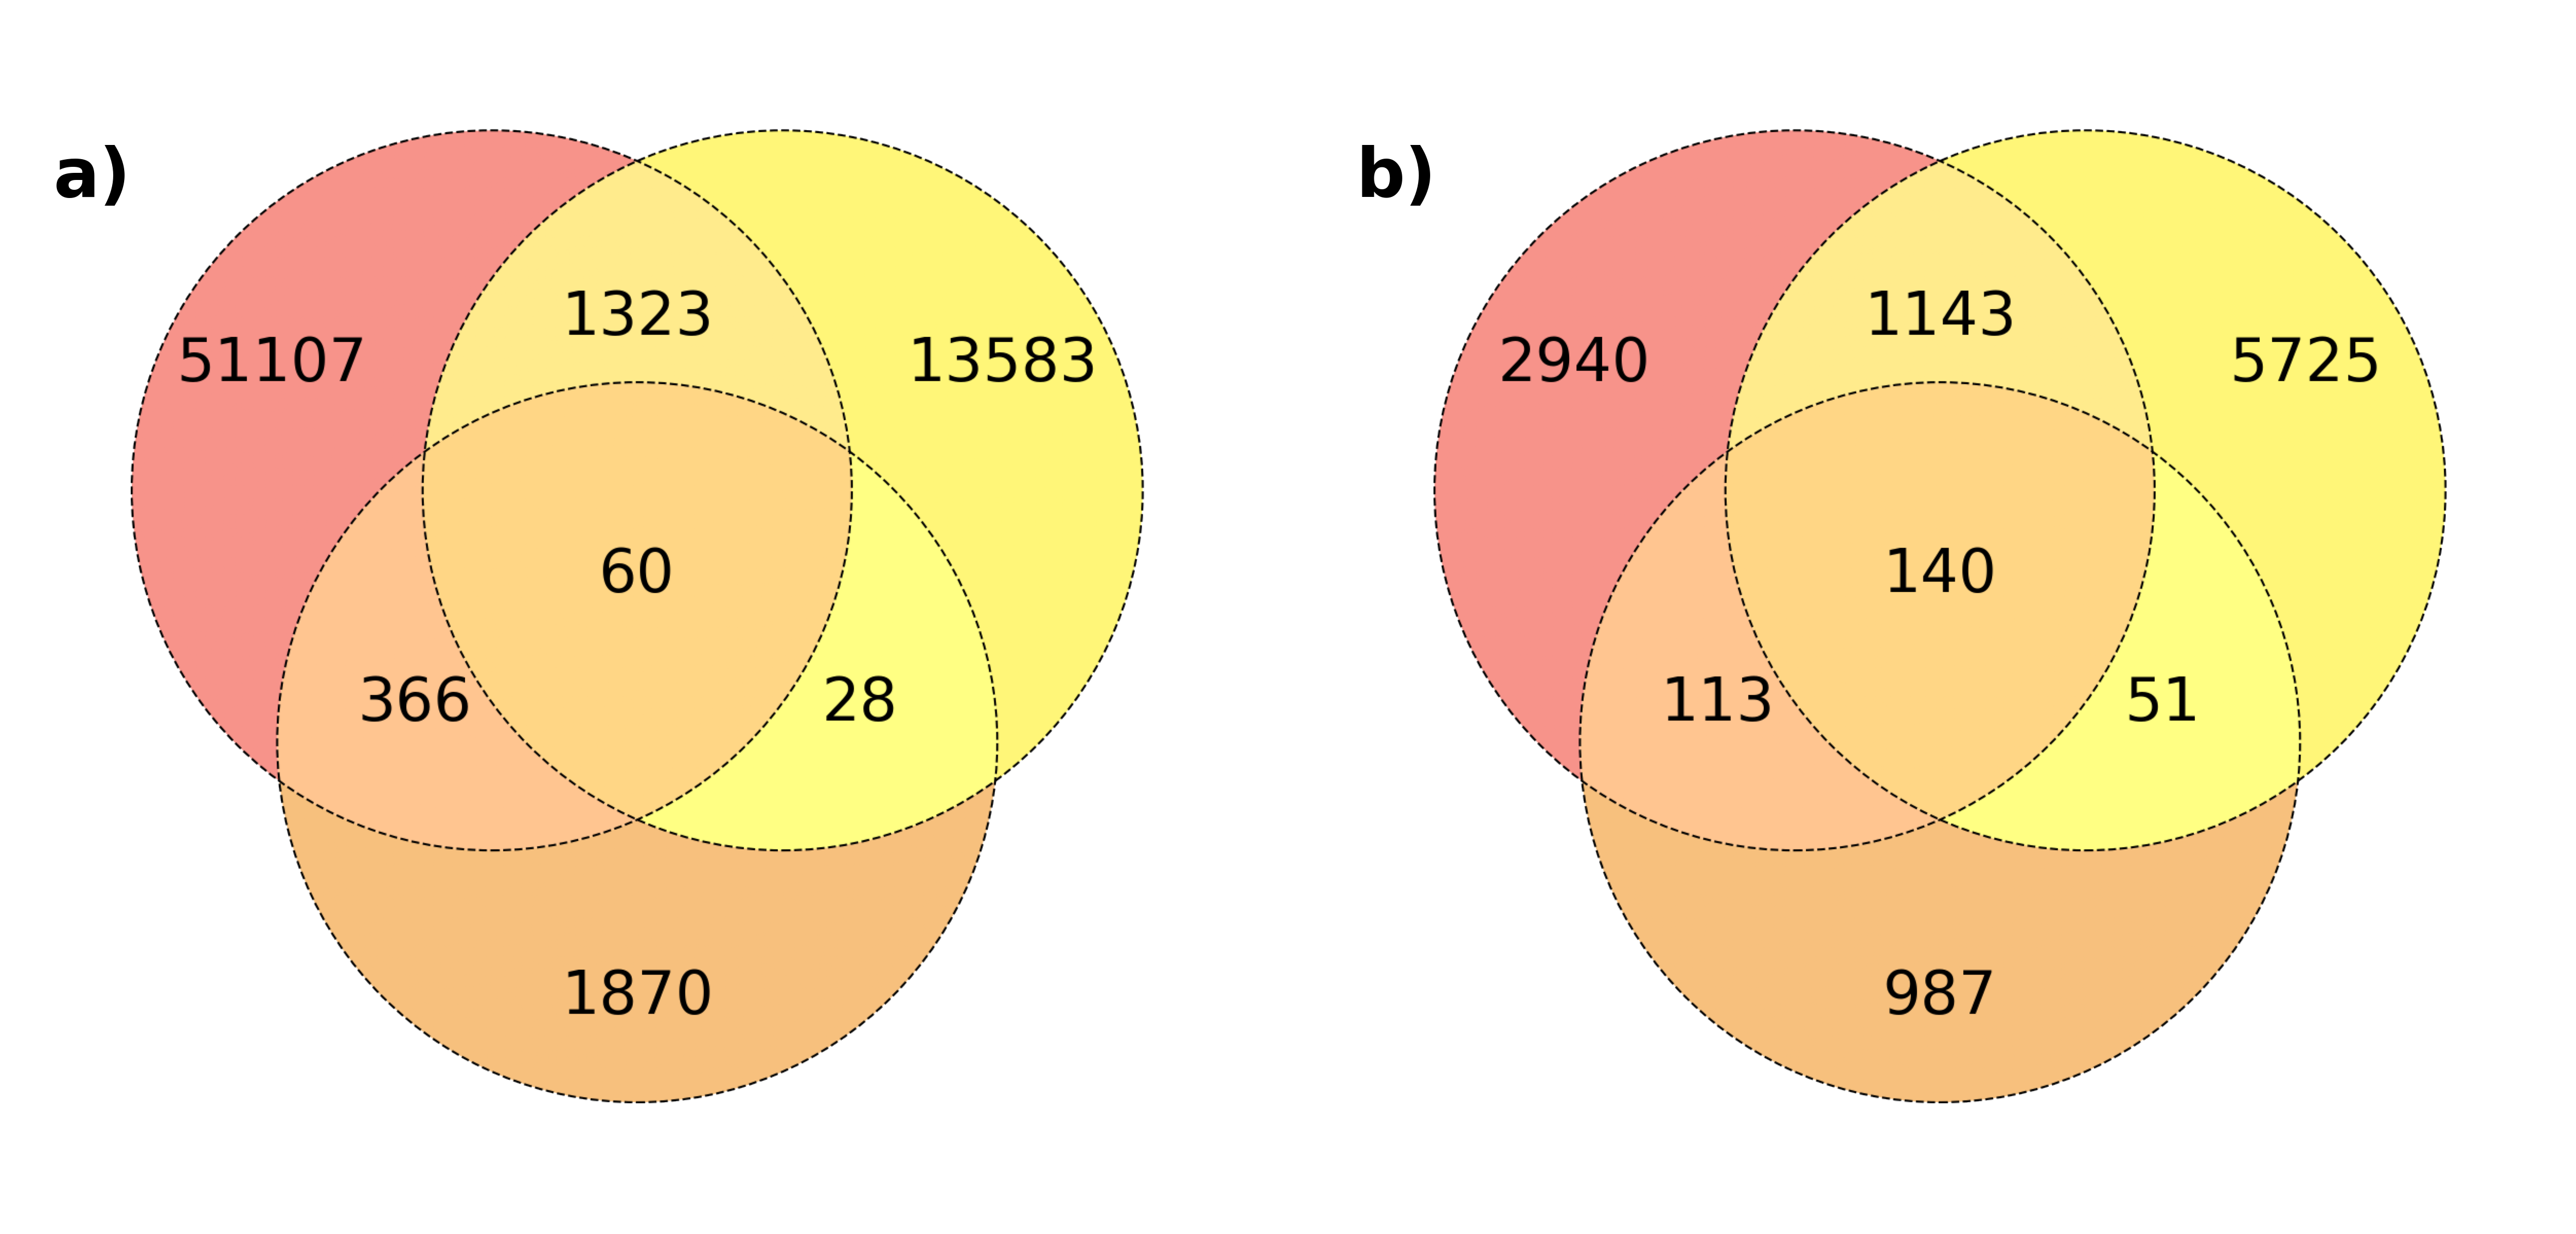

In [ ]:
# call the previously called figures
image_paths = ['overlap_compounds.png',
               'overlap_scaffolds.png']
# create labels with literals for each image in the grid:
labels = ['a)', 'b)']

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, dpi = 300, facecolor = 'w', edgecolor = 'k',
                        gridspec_kw = {'hspace': 0.05, 'wspace': 0.05}, figsize = (20, 10))

for i, ax in enumerate(axs.flat):
  if i < len(image_paths):
    img = plt.imread(image_paths[i])
    ax.imshow(img)
    ax.axis('off')
    # add the literal labels created
    ax.annotate(labels[i], xy = (0.03, 0.85), xycoords = 'axes fraction', fontsize = 30, weight = 'bold')
  else:
    ax.axis('off')
plt.tight_layout()

plt.savefig('overlap_visualization.png', bbox_inches = 'tight', pad_inches = 0, dpi = 600)